<a href="https://colab.research.google.com/github/naveen7111/data-science-and-ml/blob/main/Neural_Nets_Pretrained_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [31]:
import numpy as np
import tensorflow as tf
import keras

from keras.preprocessing.image import img_to_array, load_img
from keras.applications.inception_resnet_v2 import InceptionResNetV2 , decode_predictions , preprocess_input
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input as preprocess_input_vgg19
from keras.applications.vgg19 import decode_predictions as decode_predictions_vgg19

from IPython.core.display import display

# Constants

In [2]:
file_1 = 'drive/MyDrive/Pretrained Image Classification/01 Umbrella.jpg'
file_2 = 'drive/MyDrive/Pretrained Image Classification/02 Couple.jpg'
file_3 = 'drive/MyDrive/Pretrained Image Classification/03 Ocean.jpg'
file_4 = 'drive/MyDrive/Pretrained Image Classification/04 Horse.jpg'

# Preprocessing Images

In [41]:
def format_img_inceptionresnet(filename):
  pic = load_img(filename , target_size=(299,299))
  pic_array = img_to_array(pic)
  expanded = np.expand_dims(pic_array , axis=0)
  return preprocess_input(expanded)

def format_img_vgg19(filename):
  pic = load_img(filename , target_size=(224,224))
  pic_array = img_to_array(pic)
  expanded = np.expand_dims(pic_array , axis=0)
  return preprocess_input_vgg19(expanded)

# Load InceptionResNet

In [8]:
inception_model = InceptionResNetV2(weights='imagenet')

225214464/225209952 [==============================] - 2s 0us/step


In [11]:
inception_model.graph = tf.compat.v1.get_default_graph()

# Making Predictions

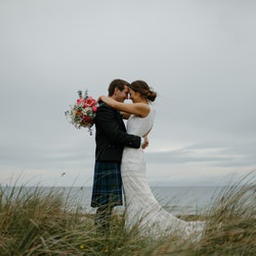

[[('n10148035', 'groom', 0.7042389),
  ('n03450230', 'gown', 0.11669549),
  ('n11879895', 'rapeseed', 0.016582673),
  ('n09421951', 'sandbar', 0.012790637),
  ('n03534580', 'hoopskirt', 0.0072877705)]]

In [26]:
data = format_img_inceptionresnet(file_2)
prediction = inception_model.predict(data)
display(load_img(file_2))
decode_predictions(prediction)

# Testing the VGG19 Model

In [30]:
vgg19_model = VGG19()

574717952/574710816 [==============================] - 4s 0us/step


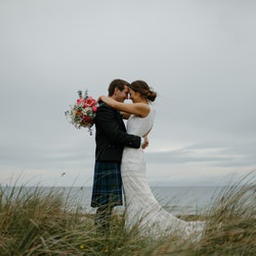

[[('n10148035', 'groom', 0.21170992),
  ('n02100735', 'English_setter', 0.044719275),
  ('n09399592', 'promontory', 0.036268897),
  ('n03450230', 'gown', 0.035969306),
  ('n02102040', 'English_springer', 0.03592263)]]

In [42]:
data = format_img_vgg19(file_2)
pred = vgg19_model.predict(data)
display(load_img(file_2))
decode_predictions_vgg19(pred)